In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

100%|██████████| 346M/346M [00:20<00:00, 18.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


In [ ]:
import os

# Use the path obtained from kagglehub
dataset_path = path  # Update with your actual path

# Check the contents of the main dataset directory
print("Dataset Directory Contents:")
print(os.listdir(dataset_path))

# Check the contents of the 'seg_train' directory
train_dir = os.path.join(dataset_path, 'seg_train')
if os.path.exists(train_dir):
    print("\nContents of 'seg_train':")
    print(os.listdir(train_dir))
else:
    print("'seg_train' directory not found.")

# Check for subdirectories in 'seg_train'
subdirs = os.listdir(train_dir) if os.path.exists(train_dir) else []
print("\nSubdirectories in 'seg_train':")
print(subdirs)

# Check the contents of a specific subdirectory if it exists
if subdirs:
    example_subdir = os.path.join(train_dir, subdirs[0])  # Check the first subdirectory
    print(f"\nContents of '{subdirs[0]}':")
    print(os.listdir(example_subdir))


Dataset Directory Contents:
['seg_train', 'seg_test', 'seg_pred']

Contents of 'seg_train':
['seg_train']

Subdirectories in 'seg_train':
['seg_train']

Contents of 'seg_train':
['glacier', 'mountain', 'street', 'buildings', 'forest', 'sea']


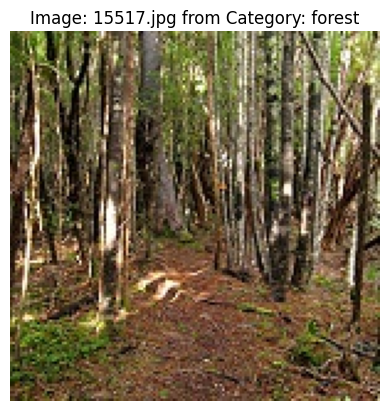

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Use the path obtained from kagglehub
dataset_path = path  # Update with your actual path

# Choose the 'seg_train' category
category = 'seg_train'
category_path = os.path.join(dataset_path, category, category)  # Navigate to the nested 'seg_train' directory

# List the subdirectories (categories)
subdirs = os.listdir(category_path)

# Ensure there are subdirectories to choose from
if not subdirs:
    print("No subdirectories found in the category.")
else:
    # Randomly select a category (subdirectory)
    selected_subdir = random.choice(subdirs)
    selected_path = os.path.join(category_path, selected_subdir)

    # List image files in the selected category
    image_files = [f for f in os.listdir(selected_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Ensure there are image files to choose from
    if not image_files:
        print(f"No image files found in category: {selected_subdir}.")
    else:
        # Randomly select an image file
        random_image = random.choice(image_files)
        image_to_load = os.path.join(selected_path, random_image)

        # Load and display the image
        image = Image.open(image_to_load)

        plt.imshow(image)
        plt.title(f"Image: {random_image} from Category: {selected_subdir}")
        plt.axis('off')
        plt.show()


Visualize a few samples from the dataset, displaying their corresponding
labels.

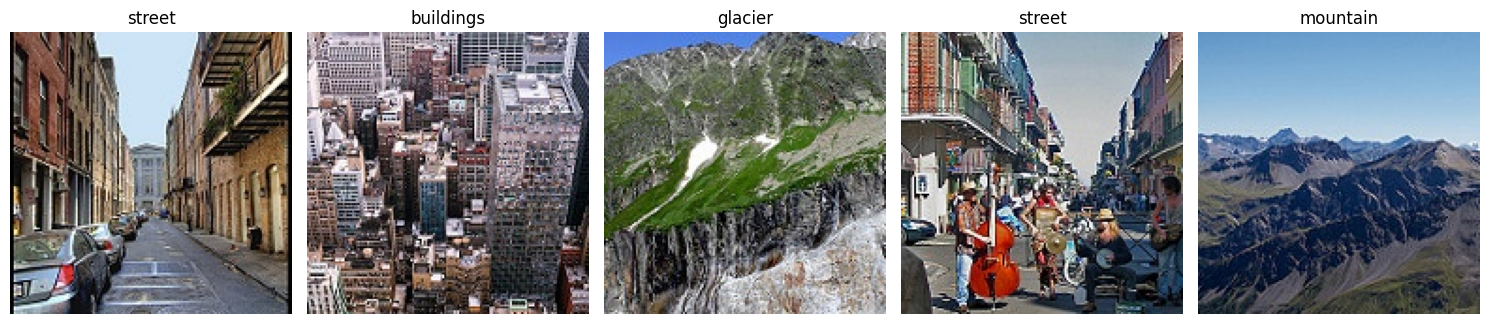

In [ ]:
# Set the number of samples to visualize
num_samples = 5

# Create a figure for visualization
plt.figure(figsize=(15, 10))

for i in range(num_samples):
    # Randomly select a category (subdirectory)
    selected_subdir = random.choice(subdirs)
    selected_path = os.path.join(category_path, selected_subdir)

    # List image files in the selected category
    image_files = [f for f in os.listdir(selected_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Randomly select an image file
    random_image = random.choice(image_files)
    image_to_load = os.path.join(selected_path, random_image)

    # Load the image
    image = Image.open(image_to_load)

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image)
    plt.title(selected_subdir)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model():
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))  # 6 categories for output

    return model

# Create the model
cnn_model = create_cnn_model()
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_experimental_cnn_model():
    model = models.Sequential()

    # Convolutional Layer 1 with different kernel size
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Using average pooling

    # Convolutional Layer 2 with a different activation function
    model.add(layers.Conv2D(64, (3, 3), activation='tanh'))  # Using tanh activation
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    return model

# Create the experimental model
experimental_cnn_model = create_experimental_cnn_model()
experimental_cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 146, 146, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289,990 (16.37 MB)

 Trainable params: 4,289,990 (16.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_advanced_cnn_model():
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer
    model.add(layers.Dense(6, activation='softmax'))  # 6 categories for output

    return model

# Create the advanced model
advanced_cnn_model = create_advanced_cnn_model()
advanced_cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,022 (18.43 MB)

 Trainable params: 4,829,574 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

Splitting the data into train and test

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(path, 'seg_train', 'seg_train')
validation_dir = os.path.join(path, 'seg_test', 'seg_test')

train_datagen = ImageDataGenerator(
    rescale=1.0/255,           # Normalize pixel values
    validation_split=0.2,      # Use 20% of the training data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),    # Resize images
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='validation'
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


Compile the Model

In [ ]:
model = create_advanced_cnn_model()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Training the model

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25
)


Epoch 1/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 91s 256ms/step - accuracy: 0.5223 - loss: 1.1783 - val_accuracy: 0.6081 - val_loss: 0.9979
Epoch 2/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5000 - loss: 1.1493 - val_accuracy: 0.6000 - val_loss: 0.9626
Epoch 3/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 92s 258ms/step - accuracy: 0.5578 - loss: 1.1370 - val_accuracy: 0.6394 - val_loss: 0.9793
Epoch 4/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5312 - loss: 1.2625 - val_accuracy: 0.6000 - val_loss: 0.9384
Epoch 5/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 91s 255ms/step - accuracy: 0.5665 - loss: 1.0958 - val_accuracy: 0.5869 - val_loss: 1.0479
Epoch 6/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.4688 - loss: 0.9116 - val_accuracy: 0.8000 - val_loss: 0.7898
Epoch 7/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 91s 256ms/step - accuracy: 0.5820 - loss: 1.0831 - val_accuracy: 0.5233 - val_loss: 1.1194
Epoch 8/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6562 - loss: 1.1083 - 